### **Q1 Ideal, Gaussian, ButterW LPF and HPF**

Dropdown(description='Image:', options=('einstein.png', 'marilyn.png', 'cameraman_noisy1.jpg'), value='einstei…

Dropdown(description='Filter Type:', options=('Ideal LPF', 'Ideal HPF', 'Gaussian LPF', 'Gaussian HPF', 'Butte…

IntSlider(value=30, continuous_update=False, description='Cutoff Freq:', min=1)

IntSlider(value=2, continuous_update=False, description='Order (Butterworth):', max=10, min=1)

<Figure size 640x480 with 0 Axes>

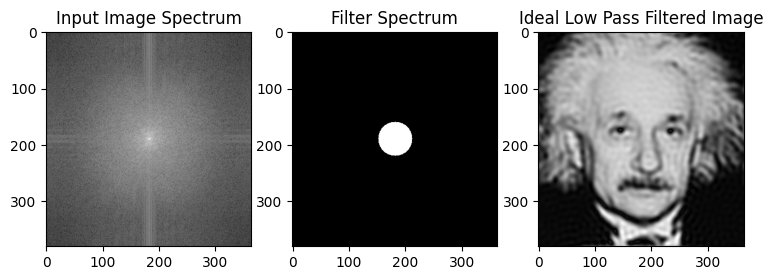

<Figure size 640x480 with 0 Axes>

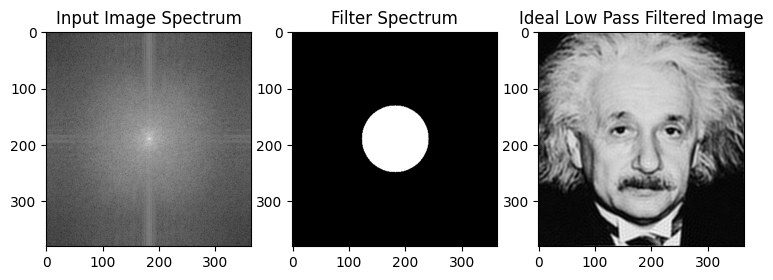

<Figure size 640x480 with 0 Axes>

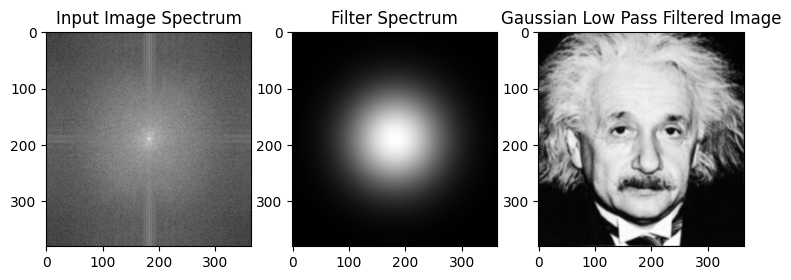

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage import io, color
import cv2
import ipywidgets as widgets
from IPython.display import display

def to_grayscale(image):
    if len(image.shape) == 3:
        return color.rgb2gray(image)
    return image

def ideal_low_pass_filter(shape, cutoff):
    P, Q = shape
    center = (P // 2, Q // 2)
    H = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0]) ** 2 + (v - center[1]) ** 2)
            if D <= cutoff:
                H[u, v] = 1
    return H

def ideal_high_pass_filter(shape, cutoff):
    return 1 - ideal_low_pass_filter(shape, cutoff)

def gaussian_low_pass_filter(shape, cutoff):
    P, Q = shape
    center = (P // 2, Q // 2)
    U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
    D2 = (U - center[0]) ** 2 + (V - center[1]) ** 2
    H = np.exp(-D2 / (2 * cutoff ** 2))
    return H

def gaussian_high_pass_filter(shape, cutoff):
    return 1 - gaussian_low_pass_filter(shape, cutoff)

def butterworth_low_pass_filter(shape, cutoff, order=2):
    P, Q = shape
    center = (P // 2, Q // 2)
    U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
    D2 = (U - center[0]) ** 2 + (V - center[1]) ** 2
    H = 1 / (1 + (D2 / cutoff ** 2) ** order)
    return H

def butterworth_high_pass_filter(shape, cutoff, order=2):
    return 1 - butterworth_low_pass_filter(shape, cutoff, order)

def apply_filter(image, filter_func, cutoff, order=2):
    # Convert image to grayscale if it's not already
    image_gray = to_grayscale(image)

    # Compute FFT of the image
    F = fftpack.fftshift(fftpack.fft2(image_gray))

    # Generate the filter
    H = filter_func(image_gray.shape, cutoff)

    # Apply the filter
    G = F * H

    # Compute the inverse FFT
    g_filtered = np.real(fftpack.ifft2(fftpack.ifftshift(G)))

    return np.log(np.abs(F)), H, np.abs(g_filtered)

def display_results(image, F, H, g_filtered, title):
    plt.figure(1)  # Ensure we are using figure 1
    plt.clf()  # Clear the current figure
    plt.figure(figsize=(9, 3))  # Set figure size

    plt.subplot(1, 3, 1)
    plt.imshow(F, cmap='gray')
    plt.title('Input Image Spectrum')

    plt.subplot(1, 3, 2)
    plt.imshow(H, cmap='gray')
    plt.title('Filter Spectrum')

    plt.subplot(1, 3, 3)
    plt.imshow(g_filtered, cmap='gray')
    plt.title(title)

    plt.show()

def process_image(image_path, filter_type, cutoff, order=2):
    # Read image
    image = io.imread(image_path)

    # Apply selected filter
    if filter_type == 'Ideal LPF':
        F, H, g_filtered = apply_filter(image, ideal_low_pass_filter, cutoff)
        title = 'Ideal Low Pass Filtered Image'
    elif filter_type == 'Ideal HPF':
        F, H, g_filtered = apply_filter(image, ideal_high_pass_filter, cutoff)
        title = 'Ideal High Pass Filtered Image'
    elif filter_type == 'Gaussian LPF':
        F, H, g_filtered = apply_filter(image, gaussian_low_pass_filter, cutoff)
        title = 'Gaussian Low Pass Filtered Image'
    elif filter_type == 'Gaussian HPF':
        F, H, g_filtered = apply_filter(image, gaussian_high_pass_filter, cutoff)
        title = 'Gaussian High Pass Filtered Image'
    elif filter_type == 'Butterworth LPF':
        F, H, g_filtered = apply_filter(image, butterworth_low_pass_filter, cutoff, order)
        title = 'Butterworth Low Pass Filtered Image'
    elif filter_type == 'Butterworth HPF':
        F, H, g_filtered = apply_filter(image, butterworth_high_pass_filter, cutoff, order)
        title = 'Butterworth High Pass Filtered Image'

    # Display the results
    display_results(image, F, H, g_filtered, title)

# Interactive Widgets for Filter Selection
image_selector = widgets.Dropdown(
    options=['einstein.png', 'marilyn.png', 'cameraman_noisy1.jpg'],  # Add more image paths as needed
    value='einstein.png',
    description='Image:',
    disabled=False,
)

filter_selector = widgets.Dropdown(
    options=['Ideal LPF', 'Ideal HPF', 'Gaussian LPF', 'Gaussian HPF', 'Butterworth LPF', 'Butterworth HPF'],
    value='Ideal LPF',
    description='Filter Type:',
    disabled=False,
)

cutoff_slider = widgets.IntSlider(
    value=30,
    min=1,
    max=100,
    step=1,
    description='Cutoff Freq:',
    continuous_update=False,
)

order_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description='Order (Butterworth):',
    continuous_update=False,
)

# Display interactive widgets
display(image_selector, filter_selector, cutoff_slider, order_slider)

# Define the action on change
def update_image(_):
    plt.figure(1)  # Ensure the right figure is selected before updating
    plt.clf()  # Clear any previous content in the figure
    process_image(image_selector.value, filter_selector.value, cutoff_slider.value, order_slider.value)

# Link the widgets with the update function
image_selector.observe(update_image, names='value')
filter_selector.observe(update_image, names='value')
cutoff_slider.observe(update_image, names='value')
order_slider.observe(update_image, names='value')

# Initial call to display the default values
update_image(None)


### **Q2 Einstein Marilyn Hybrid**

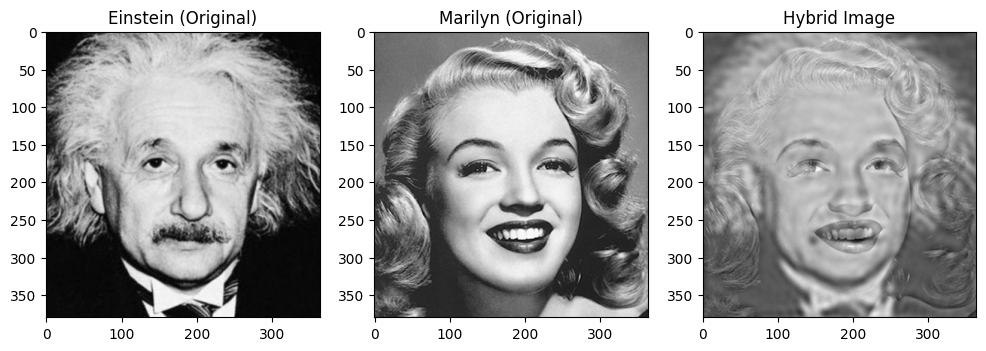

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage import io, color, transform

def to_grayscale(image):
    if len(image.shape) == 3:
        return color.rgb2gray(image)
    return image

def low_pass_filter(image, cutoff):
    """Apply a low-pass filter by zeroing out high frequency components."""
    F = fftpack.fftshift(fftpack.fft2(image))
    P, Q = image.shape
    center = (P // 2, Q // 2)
    H = np.zeros((P, Q))
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0]) ** 2 + (v - center[1]) ** 2)
            if D <= cutoff:
                H[u, v] = 1
    F_filtered = F * H
    image_filtered = np.real(fftpack.ifft2(fftpack.ifftshift(F_filtered)))
    return image_filtered

def high_pass_filter(image, cutoff):
    """Apply a high-pass filter by zeroing out low frequency components."""
    F = fftpack.fftshift(fftpack.fft2(image))
    P, Q = image.shape
    center = (P // 2, Q // 2)
    H = np.ones((P, Q))
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0]) ** 2 + (v - center[1]) ** 2)
            if D <= cutoff:
                H[u, v] = 0
    F_filtered = F * H
    image_filtered = np.real(fftpack.ifft2(fftpack.ifftshift(F_filtered)))
    return image_filtered

def hybrid_image(image1, image2, low_pass_cutoff, high_pass_cutoff):
    """Create a hybrid image by combining a low-pass filtered and high-pass filtered image."""
    image1 = to_grayscale(image1)
    image2 = to_grayscale(image2)

    # Apply low-pass filter to the first image
    low_pass_image = low_pass_filter(image1, low_pass_cutoff)

    # Apply high-pass filter to the second image
    high_pass_image = high_pass_filter(image2, high_pass_cutoff)

    # Combine the two filtered images
    hybrid = low_pass_image + high_pass_image

    return hybrid

# Load the images
image1 = io.imread('einstein.png')
image2 = io.imread('marilyn.png')

# Resize images to the same size
image2 = transform.resize(image2, image1.shape)

# Set cut-off frequencies for the filters
low_pass_cutoff = 30
high_pass_cutoff = 15

# Create the hybrid image
hybrid_img = hybrid_image(image1, image2, low_pass_cutoff, high_pass_cutoff)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(to_grayscale(image1), cmap='gray')
plt.title('Einstein (Original)')

plt.subplot(1, 3, 2)
plt.imshow(to_grayscale(image2), cmap='gray')
plt.title('Marilyn (Original)')

plt.subplot(1, 3, 3)
plt.imshow(hybrid_img, cmap='gray')
plt.title('Hybrid Image')

plt.show()


### **Q3 Noisy 1 (vertical periodic strip)**

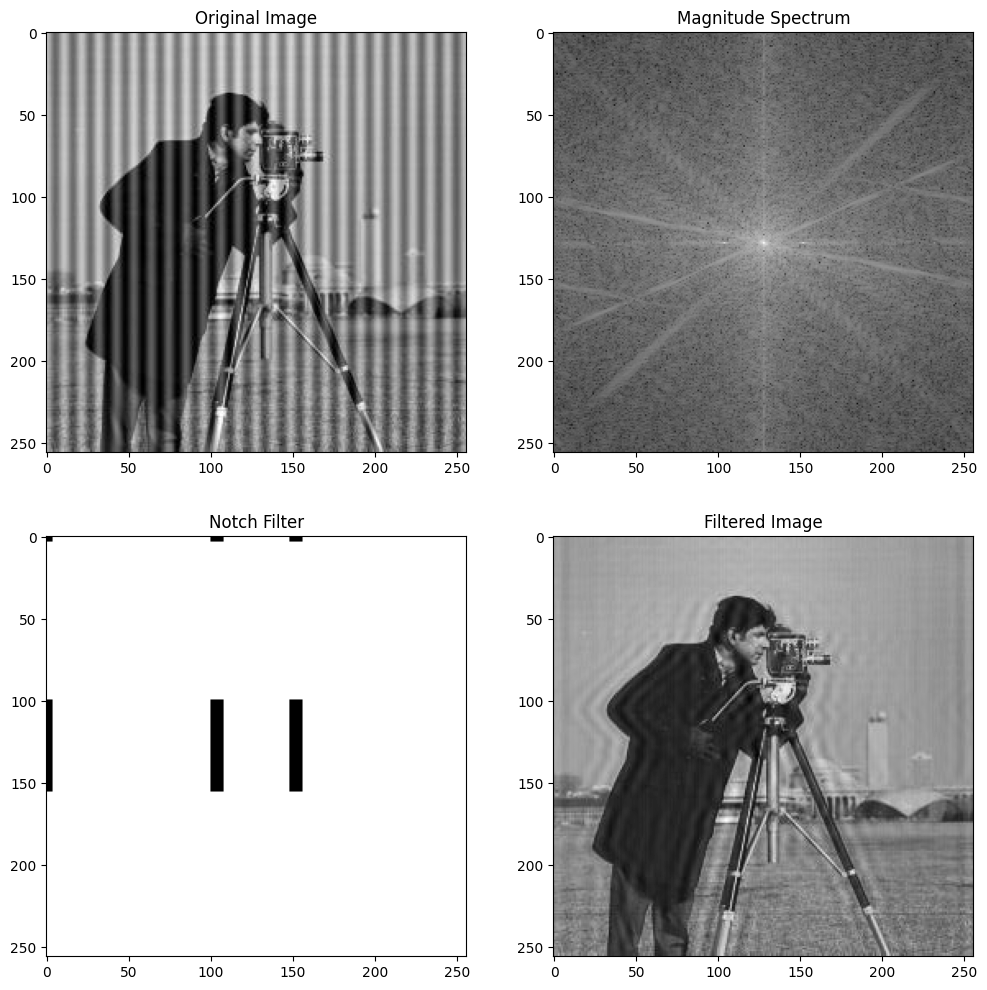

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, restoration
import cv2

def to_grayscale(image):
    if len(image.shape) == 3:
        return color.rgb2gray(image)
    return image

def apply_median_filter(image, kernel_size=3):
    """Apply a median filter to remove salt-and-pepper noise."""
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, sigma=1):
    """Apply a Gaussian filter to remove Gaussian noise."""
    return cv2.GaussianBlur(image, (0, 0), sigma)

from scipy import fftpack

def remove_striping_noise(image_path):
    # Load the image
    image = io.imread(image_path, as_gray=True)

    # Perform FFT
    F = fftpack.fftshift(fftpack.fft2(image))

    # Display the magnitude spectrum
    magnitude_spectrum = np.log(1 + np.abs(F))

    # Create a notch filter to suppress the vertical stripes
    P, Q = image.shape
    notch_filter = np.zeros((P, Q))

    # Define the notch locations (these will need to be adjusted based on the noise pattern)
    notch_width = 12  # Width of the notch
    cutoff_freq = P // 30  # This is an approximate position; adjust as needed

    # Suppress vertical stripes
    for i in range(-1, 2):  # Adjust the range for multiple stripes
        notch_filter[:, Q // 2 + i * cutoff_freq - notch_width:Q // 2 + i * cutoff_freq + notch_width] = 1
        notch_filter[:, Q // 2 - i * cutoff_freq - notch_width:Q // 2 - i * cutoff_freq + notch_width] = 1

    for i in range(-20, -4):  # Adjust the range for multiple stripes
        notch_filter[:, Q // 2 + i * cutoff_freq - notch_width:Q // 2 + i * cutoff_freq + notch_width] = 1
        notch_filter[:, Q // 2 - i * cutoff_freq - notch_width:Q // 2 - i * cutoff_freq + notch_width] = 1

    for i in range(5, 20):  # Adjust the range for multiple stripes
        notch_filter[:, Q // 2 + i * cutoff_freq - notch_width:Q // 2 + i * cutoff_freq + notch_width] = 1
        notch_filter[:, Q // 2 - i * cutoff_freq - notch_width:Q // 2 - i * cutoff_freq + notch_width] = 1


    for i in range(-23, -4):  # Adjust the range for multiple stripes
        notch_filter[Q // 2 + i * cutoff_freq - notch_width:Q // 2 + i * cutoff_freq + notch_width, :] = 1
        notch_filter[Q // 2 - i * cutoff_freq - notch_width:Q // 2 - i * cutoff_freq + notch_width, :] = 1

    for i in range(5, 20):  # Adjust the range for multiple stripes
        notch_filter[:, Q // 2 + i * cutoff_freq - notch_width:Q // 2 + i * cutoff_freq + notch_width] = 1
        notch_filter[:, Q // 2 - i * cutoff_freq - notch_width:Q // 2 - i * cutoff_freq + notch_width] = 1

    # Apply the notch filter
    F_filtered = F * notch_filter

    # Perform inverse FFT
    image_filtered = np.real(fftpack.ifft2(fftpack.ifftshift(F_filtered)))

    # Display the results
    plt.figure(figsize=(12, 12))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')

    plt.subplot(2, 2, 3)
    plt.imshow(notch_filter, cmap='gray')
    plt.title('Notch Filter')

    plt.subplot(2, 2, 4)
    plt.imshow(image_filtered, cmap='gray')
    plt.title('Filtered Image')

    plt.show()

# Apply the function to remove striping noise
remove_striping_noise('cameraman_noisy1.jpg')



# def denoise_image(image_path, method='median', kernel_size=3, sigma=1):
#     """Denoise an image using the specified method."""
#     image = io.imread(image_path)
#     image_gray = to_grayscale(image).astype(np.float32)

#     if method == 'median':
#         filtered_image = apply_median_filter(image_gray, kernel_size)
#     elif method == 'gaussian':
#         filtered_image = apply_gaussian_filter(image_gray, sigma)
#     else:
#         raise ValueError("Unknown method. Choose 'median' or 'gaussian'.")

#     return filtered_image

# def display_images(original, filtered, title_original="Original Image", title_filtered="Filtered Image"):
#     plt.figure(figsize=(12, 6))

#     plt.subplot(1, 2, 1)
#     plt.imshow(original, cmap='gray')
#     plt.title(title_original)

#     plt.subplot(1, 2, 2)
#     plt.imshow(filtered, cmap='gray')
#     plt.title(title_filtered)

#     plt.show()

# # Load and process the noisy images
# image1_path = 'cameraman_noisy1.jpg'
# image2_path = 'cameraman_noisy2.jpg'

# # Denoise the images using a median filter (effective for salt-and-pepper noise)
# denoised_image1 = denoise_image(image1_path, method='median', kernel_size=3)
# denoised_image2 = denoise_image(image2_path, method='median', kernel_size=3)

# # Display the original and denoised images
# image1 = io.imread(image1_path)
# image2 = io.imread(image2_path)

# display_images(to_grayscale(image1), denoised_image1, "Cameraman Noisy1", "Cameraman Noisy1 (Filtered)")
# display_images(to_grayscale(image2), denoised_image2, "Cameraman Noisy2", "Cameraman Noisy2 (Filtered)")


### **Q3 Noisy 2 (vertical and diagonal periodic strip)**

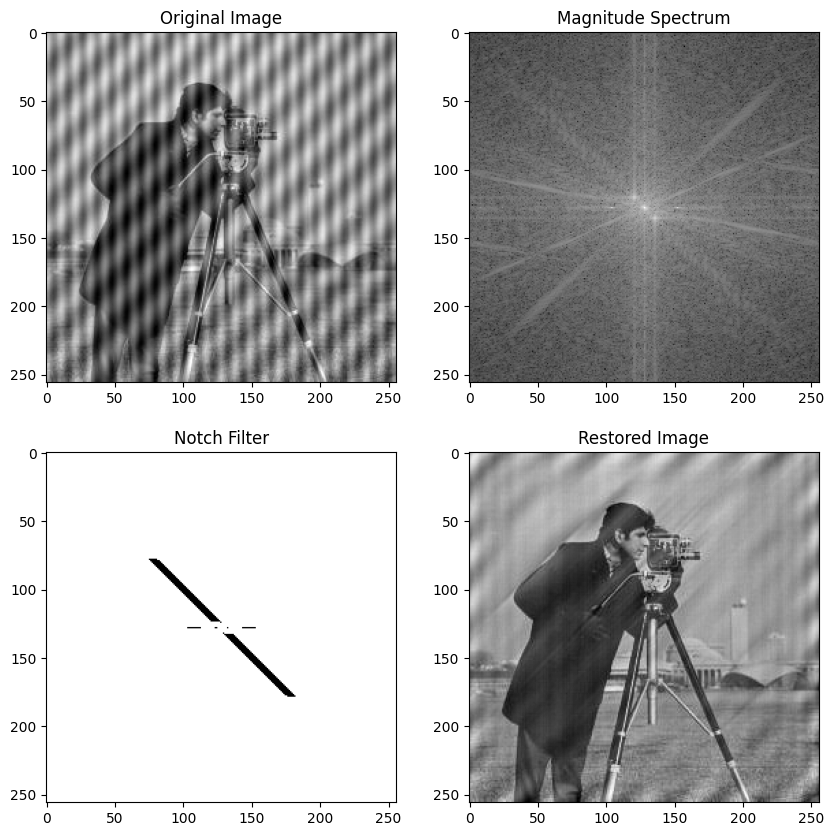

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import fftpack

def remove_vertical_and_diagonal_stripes(image_path):
    # Load the image
    image = io.imread(image_path, as_gray=True)

    # Perform FFT to convert the image to the frequency domain
    F = fftpack.fftshift(fftpack.fft2(image))

    # Get the magnitude spectrum for analysis
    magnitude_spectrum = np.log(1 + np.abs(F))

    # Image dimensions
    P, Q = image.shape
    notch_filter = np.ones((P, Q))

    # Notch for vertical stripes (along horizontal axis in frequency domain)
    vertical_cutoff_freq = 20
    notch_width = 5  # Adjust as needed
    notch_width_2 = 3
    notch_width_3 = 2

    for i in range(-notch_width, notch_width):
        notch_filter[P//2, Q//2 + i] = 0  # Horizontal axis (vertical stripes)
        notch_filter[P//2, Q//2 + i + vertical_cutoff_freq] = 0
        notch_filter[P//2, Q//2 + i - vertical_cutoff_freq] = 0

    # Notch for diagonal stripes (diagonal axes in frequency domain)
    diagonal_cutoff_freq = 50  # Adjust as needed

    for i in range(-diagonal_cutoff_freq, diagonal_cutoff_freq):
        for j in range(-notch_width_2, notch_width_2):
            notch_filter[P//2 + i, Q//2 + i + j] = 0  # Positive diagonal
            notch_filter[P//2 - i, Q//2 - i - j] = 0  # Negative diagonal


    diagonal_cutoff_freq_2 = 4  # Adjust as needed

    for i in range(-diagonal_cutoff_freq_2, diagonal_cutoff_freq_2):
        for j in range(-3, 3):
            notch_filter[P//2 + i, Q//2 + i + j] = 1  # Positive diagonal
            notch_filter[P//2 - i, Q//2 - i - j] = 1  # Negative diagonal


    # for i in range(-1, 2):  # Adjust the range for multiple stripes
    #     notch_filter[:, Q // 2 + i * vertical_cutoff_freq - notch_width:Q // 2 + i * vertical_cutoff_freq + notch_width] = 1
    #     notch_filter[:, Q // 2 - i * vertical_cutoff_freq - notch_width:Q // 2 - i * vertical_cutoff_freq + notch_width] = 1

    # Apply the notch filter to the frequency domain representation
    F_filtered = F * notch_filter

    # Perform inverse FFT to reconstruct the image
    image_filtered = np.real(fftpack.ifft2(fftpack.ifftshift(F_filtered)))

    # Display the results
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')

    plt.subplot(2, 2, 3)
    plt.imshow(notch_filter, cmap='gray')
    plt.title('Notch Filter')

    plt.subplot(2, 2, 4)
    plt.imshow(image_filtered, cmap='gray')
    plt.title('Restored Image')

    plt.show()

    return image_filtered

# Apply the function to remove vertical and diagonal stripping noise
filtered_image = remove_vertical_and_diagonal_stripes('cameraman_noisy2.jpg')
